In [13]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px

from datetime import datetime
from scipy.stats import iqr 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [14]:
data1 = pd.read_csv("C:/Users/Michael.A_Sydani/Desktop/customer_segmentations/data/marketing_campaign.csv", sep="\t")
data1.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [15]:
data1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [16]:
data1.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [17]:
data1.shape

(2240, 29)

In [18]:
data1.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### DATA CONTENT

##### CUSTOMERS:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise.

##### PRODUCTS:
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

##### CAMPAIGNS:
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

##### PLACES:
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

#### EDA & DATA CLEANING

##### BIRTH YEAR:

- Convert birth year to age

In [19]:
data1["Age"] = data1["Year_Birth"].apply(lambda x : datetime.now().year - x)

In [23]:
data1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,57
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,78
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,43
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,68


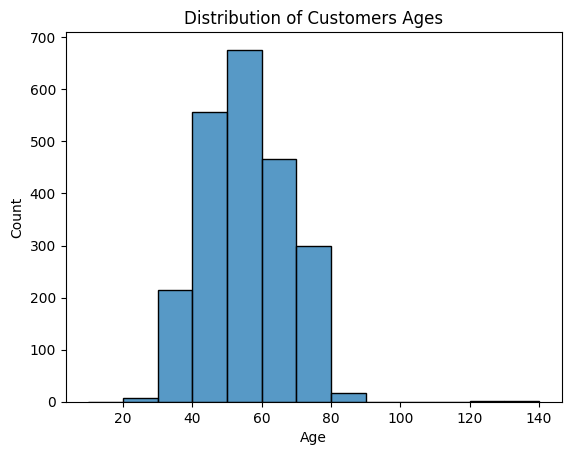

In [25]:
# Plot Age histogram

sns.histplot(data=data1, x="Age", bins = list(range(10, 150, 10)))
plt.title("Distribution of Customers Ages")
plt.savefig("Age.png")

OBSERVATION: Most customers are between age range 40 - 60.

##### CUSTOMERS EDUCATION:

- Rename education responses for uniformity.

In [26]:
data1["Education"] = data1["Education"].replace({"Graduation":"Graduate", "PhD":"Postgraduate", "Master":"Postgraduate", "2n Cycle":"Postgraduate", "Basic":"Undergraduate"})

data1["Education"].value_counts()


Education
Graduate         1127
Postgraduate     1059
Undergraduate      54
Name: count, dtype: int64

Text(0.5, 1.0, 'Frequency of Customers Education Distribution')

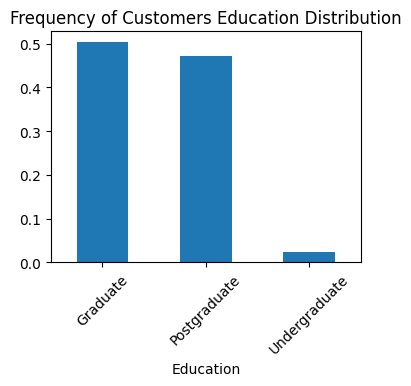

In [28]:
# Plot Education Bar Chart

data1["Education"].value_counts(normalize=True).plot.bar(figsize=(4, 3))

plt.xticks(rotation=45)
plt.title("Frequency of Customers Education Distribution")

OBSERVATION: From the CHART above, half of customers highest education level is first degree graduation. About 50% of customers have their education level at bachelor's degree which is then followed by customers with postgraduate level of education.

#### MARITAL STATUS:

- Rename marital status responses for uniformity.

In [30]:
data1['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [31]:
data1["Marital_Status"] = data1["Marital_Status"].replace({"Together":"Married", "Absurd":"Single", "Divorced":"Single", "Alone":"Single", "YOLO":"Single", "Widow":"Single"})

data1["Marital_Status"].value_counts()

Marital_Status
Married    1444
Single      796
Name: count, dtype: int64

In [34]:
# Plot barchart for marital status

fig = px.bar(
    data1["Marital_Status"].value_counts(normalize=True),
    title = "Proportion of Customer's Marital Status",
    height=500
)

fig.update_layout(yaxis_title = "Freuency Distribution")
fig.show()

OBSERVATION: It is seen from the above summary that close to 65% of customers are married while the remaining close to 35% are single.

#### INCOME:

Text(0.5, 1.0, 'Distribution of Customers Income')

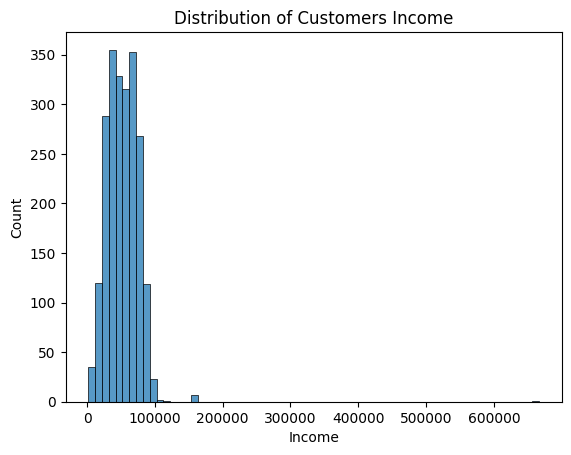

In [35]:
# Plot Histogram for income

sns.histplot(data=data1, x="Income", binwidth=1e4)
plt.title("Distribution of Customers Income")

OBSERVATION: It is seen that majority of customer's income is within 0-100k$. However we have other customer's that earn way more than that (above 600k$)

#### KIDHOME:

In [36]:
data1["Kidhome"].unique()

array([0, 1, 2], dtype=int64)

Text(0.5, 1.0, 'Proportion of Customers with Kids At Home')

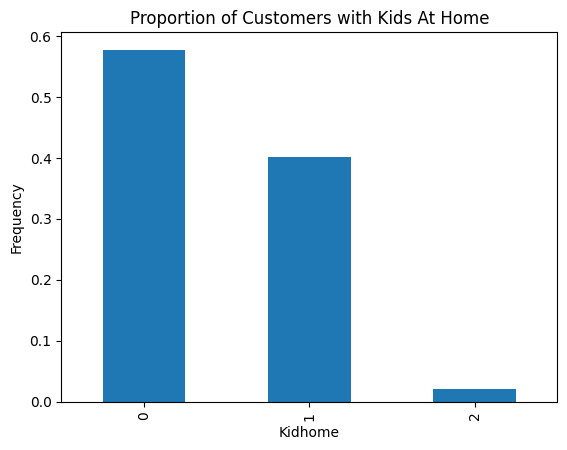

In [37]:
data1["Kidhome"].value_counts(normalize=True).plot.bar()

plt.ylabel("Frequency")
plt.title("Proportion of Customers with Kids At Home")

OBSERVATION: Above half of customers do not have kids at home.

#### TEENHOME:

In [38]:
data1["Teenhome"].unique()

array([0, 1, 2], dtype=int64)

Text(0.5, 1.0, 'Proportion of Customers With Teen At Home')

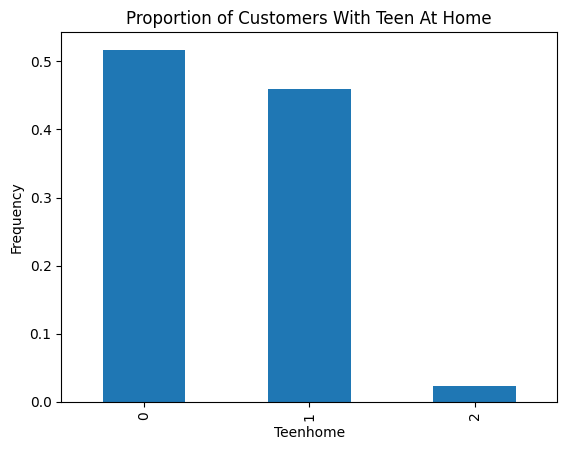

In [39]:
data1["Teenhome"].value_counts(normalize=True).plot.bar()

plt.ylabel("Frequency")
plt.title("Proportion of Customers With Teen At Home")

OBSERVATION: Above 50% of customers do not have teen at home.